In [1]:
import keras
import os
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import cv2
import numpy as np
%matplotlib inline

Using TensorFlow backend.


# Download Dataset

In [2]:
!wget http://files.fast.ai/data/dogscats.zip

--2019-06-13 16:12:35--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M   107MB/s    in 7.8s    

2019-06-13 16:12:43 (104 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



# Prepare dataset

In [0]:
!unzip dogscats.zip

In [0]:
dataset_path = "./dogscats"
training_set = dataset_path + "/train"
validation_set =dataset_path + "/valid"

In [0]:
def prepare_dataset(train_dir, val_dir, size):
  
  # training set
  
  directory = os.listdir(train_dir + '/dogs')
  train_dogs = []
  train_dogs_labels = []
  for img in directory:
    train_dogs.append(cv2.resize(cv2.imread(train_dir + '/dogs/' + img), (size, size)).reshape(-1))
    train_dogs_labels.append(1)
    
  train_dogs = np.array(train_dogs)
  train_dogs_labels = np.array(train_dogs_labels)
  directory = os.listdir(train_dir + '/cats')
  train_cats = []
  train_cats_labels = []
  for img in directory:
    train_cats.append(cv2.resize(cv2.imread(train_dir + '/cats/' + img), (size, size)).reshape(-1))
    train_cats_labels.append(0)

  train_cats = np.array(train_cats)
  train_cats_labels = np.array(train_cats_labels)
  
  # validation set
  
  directory = os.listdir(val_dir + '/dogs')
  val_dogs = []
  val_dogs_labels = []
  for img in directory:
    val_dogs.append(cv2.resize(cv2.imread(val_dir + '/dogs/' + img), (size, size)).reshape(-1))
    val_dogs_labels.append(1)
    
  val_dogs = np.array(val_dogs)
  val_dogs_labels = np.array(val_dogs_labels)
  
  directory = os.listdir(val_dir + '/cats')
  val_cats = []
  val_cats_labels = []
  for img in directory:
    val_cats.append(cv2.resize(cv2.imread(val_dir + '/cats/' + img), (size, size)).reshape(-1))
    val_cats_labels.append(0)

  val_cats = np.array(val_cats)
  val_cats_labels = np.array(val_cats_labels)
  
  
  x_train = np.concatenate((train_dogs, train_cats))
  y_train = np.concatenate((train_dogs_labels, train_cats_labels))
  
  x_test = np.concatenate((val_dogs, val_cats))
  y_test = np.concatenate((val_dogs_labels, val_cats_labels))
  
  x_train, y_train = shuffle(x_train, y_train, random_state=123)
  x_test, y_test = shuffle(x_test, y_test, random_state=123)
  
  return x_train, y_train, x_test, y_test

In [0]:
x_train, y_train, x_test, y_test = prepare_dataset(training_set, validation_set, size=28)

In [7]:
print("Shape of images in the training set:", x_train.shape)

Shape of images in the training set: (23000, 2352)


In [8]:
print("Shape of images in the validation set:", x_test.shape)

Shape of images in the validation set: (2000, 2352)


# Normalize Data

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Model architecture

In [0]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_dim=(28*28*3)))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2353      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


# Cost function, optimizer, ...

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

# Training

In [13]:
history = model.fit(x=x_train, y=y_train, epochs=50, validation_data=(x_test, y_test))

W0613 16:14:02.726102 140531334674304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 23000 samples, validate on 2000 samples
Epoch 1/50
23000/23000 [==============================] - 6s 247us/step - loss: 0.7156 - acc: 0.5457 - val_loss: 0.7070 - val_acc: 0.5455
Epoch 2/50
23000/23000 [==============================] - 2s 84us/step - loss: 0.7045 - acc: 0.5651 - val_loss: 0.6618 - val_acc: 0.5940
Epoch 3/50
23000/23000 [==============================] - 2s 84us/step - loss: 0.6962 - acc: 0.5747 - val_loss: 0.7494 - val_acc: 0.5320
Epoch 4/50
23000/23000 [==============================] - 2s 83us/step - loss: 0.6960 - acc: 0.5744 - val_loss: 0.7478 - val_acc: 0.5345
Epoch 5/50
23000/23000 [==============================] - 2s 82us/step - loss: 0.6901 - acc: 0.5849 - val_loss: 0.6902 - val_acc: 0.5755
Epoch 6/50
23000/23000 [==============================] - 2s 82us/step - loss: 0.6877 - acc: 0.5874 - val_loss: 0.8119 - val_acc: 0.5245
Epoch 7/50
23000/23000 [==============================] - 2s 83us/step - loss: 0.6878 - acc: 0.5859 - val_loss: 0.8502 - val_acc

# Plot accuracy and loss

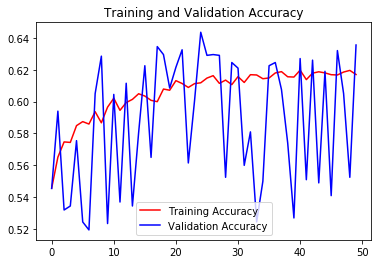

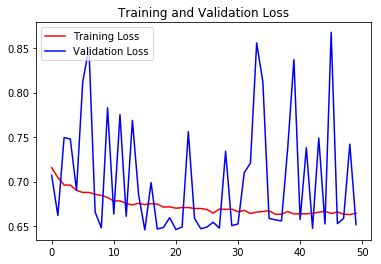

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Save the model

In [0]:
model.save('Logistic_Regression.h5')

# Evaluate the model

In [17]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
print('Accuracy on Validation Set:', test_acc)

2000/2000 [==============================] - 0s 48us/step
Accuracy on Validation Set: 0.6355


# Train more with lower learning rate

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-6),
              metrics=['acc'])

history = model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test, y_test))

Train on 23000 samples, validate on 2000 samples
Epoch 1/10
23000/23000 [==============================] - 2s 93us/step - loss: 0.6193 - acc: 0.6590 - val_loss: 0.6486 - val_acc: 0.6400
Epoch 2/10
23000/23000 [==============================] - 2s 83us/step - loss: 0.6193 - acc: 0.6583 - val_loss: 0.6487 - val_acc: 0.6405
Epoch 3/10
23000/23000 [==============================] - 2s 84us/step - loss: 0.6193 - acc: 0.6587 - val_loss: 0.6486 - val_acc: 0.6395
Epoch 4/10
23000/23000 [==============================] - 2s 83us/step - loss: 0.6193 - acc: 0.6585 - val_loss: 0.6486 - val_acc: 0.6410
Epoch 5/10
23000/23000 [==============================] - 2s 87us/step - loss: 0.6192 - acc: 0.6583 - val_loss: 0.6486 - val_acc: 0.6405
Epoch 6/10
23000/23000 [==============================] - 2s 88us/step - loss: 0.6192 - acc: 0.6580 - val_loss: 0.6486 - val_acc: 0.6410
Epoch 7/10
23000/23000 [==============================] - 2s 87us/step - loss: 0.6192 - acc: 0.6586 - val_loss: 0.6486 - val_acc:

# Save the model

In [0]:
model.save('Logistic_Regression_lower_lr.h5')

# Evaluate the model

In [21]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
print('Accuracy on Validation Set:', test_acc)

2000/2000 [==============================] - 0s 46us/step
Accuracy on Validation Set: 0.641
